In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Desktop\proj\data_driven\metadata.csv")

In [3]:
df.head(5)

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train


In [4]:
df[df['split']=='train']

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train
5,aafl,39.474744,-86.898353,2021-08-23,train
...,...,...,...,...,...
23562,zzsv,38.707825,-75.080867,2018-06-27,train
23564,zzuq,35.794000,-79.015368,2015-08-06,train
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train


In [5]:
train_data=df[df['split']=='train']

In [6]:
train_data

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
2,aacd,35.875083,-78.878434,2020-11-19,train
3,aaee,35.487000,-79.062133,2016-08-24,train
4,aaff,38.049471,-99.827001,2019-07-23,train
5,aafl,39.474744,-86.898353,2021-08-23,train
...,...,...,...,...,...
23562,zzsv,38.707825,-75.080867,2018-06-27,train
23564,zzuq,35.794000,-79.015368,2015-08-06,train
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train


In [7]:
train_data.shape

(17060, 5)

In [8]:
test_data=df[df['split']=='test']

In [9]:
test_data.head(10)

,uid,latitude,longitude,date,split
1,aabn,36.559700,-121.510000,2016-08-31,test
12,aair,33.042600,-117.076000,2014-11-01,test
14,aajw,40.703968,-80.293050,2015-08-26,test
15,aalr,38.972500,-94.672930,2019-08-26,test
16,aalw,34.279000,-118.905000,2018-01-08,test
18,aamp,40.433930,-105.033400,2017-07-28,test
21,aapj,33.889200,-117.562000,2018-01-09,test
24,aaqf,39.820323,-79.921575,2013-08-17,test
30,aauy,36.313000,-79.114978,2020-02-26,test
31,aava,40.822010,-77.469960,2018-04-11,test


In [10]:
test_data.shape

(6510, 5)

In [11]:
df['uid'].values

array(['aabm', 'aabn', 'aacd', ..., 'zzwq', 'zzyb', 'zzzi'], dtype=object)

In [12]:
sub=pd.read_csv(r"C:\Users\DELL\Desktop\proj\data_driven\submission_format.csv")

In [13]:
sub.head()

,uid,region,severity
0,aabn,west,1
1,aair,west,1
2,aajw,northeast,1
3,aalr,midwest,1
4,aalw,west,1


In [14]:
sub['severity'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
6505    1
6506    1
6507    1
6508    1
6509    1
Name: severity, Length: 6510, dtype: int64>

In [15]:
sub['region'].unique()

array(['west', 'northeast', 'midwest', 'south'], dtype=object)

In [16]:
train_labels=pd.read_csv(r"C:\Users\DELL\Desktop\proj\data_driven\train_labels.csv")

In [17]:
train_labels.head()

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0


In [18]:
train_labels['severity'].unique()

array([1, 3, 4, 2, 5], dtype=int64)

In [19]:
df.head(3)

,uid,latitude,longitude,date,split
0,aabm,39.080319,-86.430867,2018-05-14,train
1,aabn,36.559700,-121.510000,2016-08-31,test
2,aacd,35.875083,-78.878434,2020-11-19,train


In [20]:
#pd.get_dummies(train_labels['region'])

In [21]:
#x=pd.DataFrame({'region': ['midwest', 'south', 'west', 'northeast']})

In [22]:
#df_encoded = pd.get_dummies(x, columns=['region'])
#df_encoded
#train_labels

In [23]:
train_labels.head(5)
train_labels['region'].unique()

array(['midwest', 'south', 'west', 'northeast'], dtype=object)

In [24]:
train_labels['uid'].unique

<bound method Series.unique of 0        aabm
1        aacd
2        aaee
3        aaff
4        aafl
         ... 
17055    zzsv
17056    zzuq
17057    zzwo
17058    zzwq
17059    zzyb
Name: uid, Length: 17060, dtype: object>

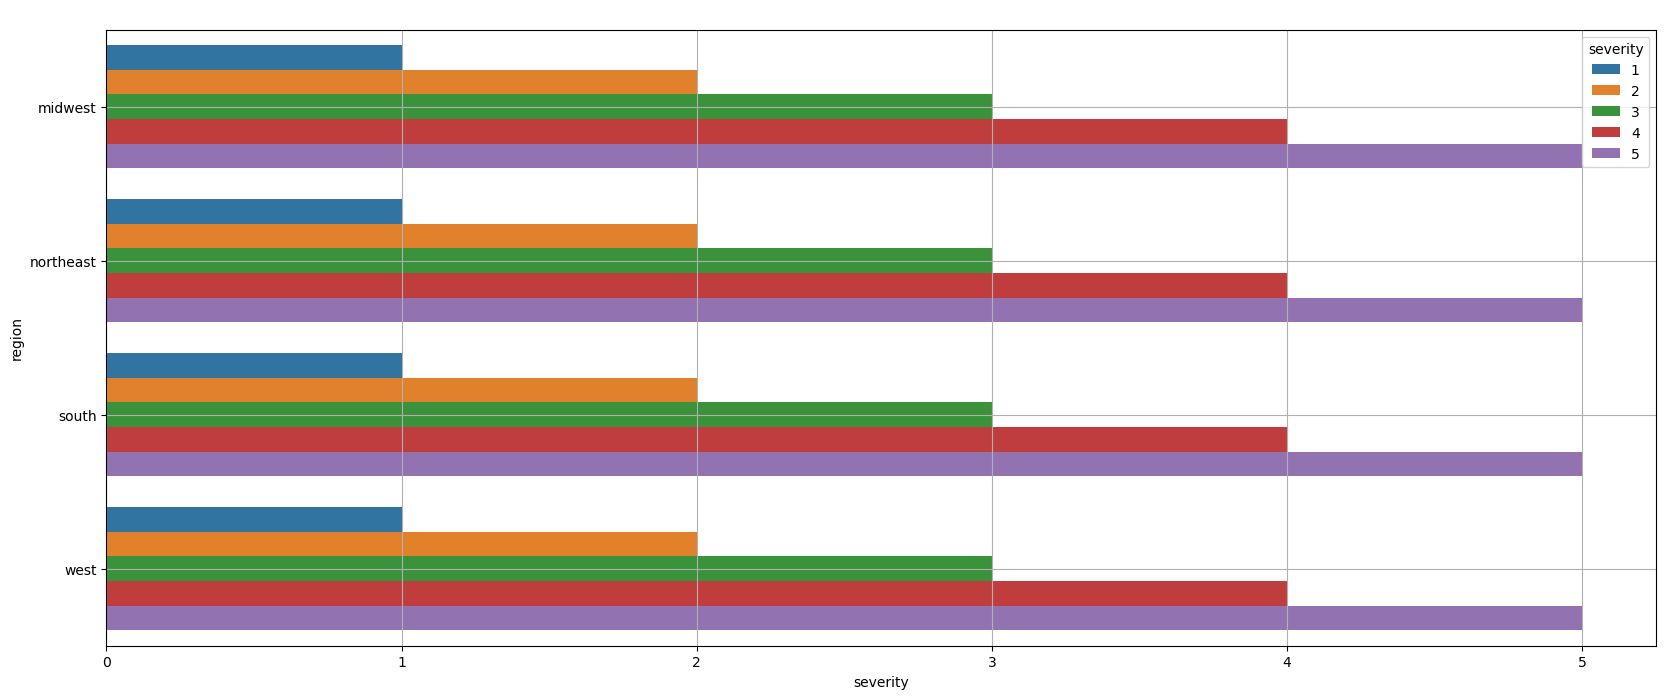

In [25]:
import matplotlib.pyplot as plt
plot1 = train_labels.groupby(by=['severity', 'region']).count().reset_index()
#plot1.head()
import seaborn as sns
plt.figure(figsize=(20, 8))
sns.barplot(data=plot1, x = 'severity', y='region', hue='severity')
plt.xlabel('severity')
plt.ylabel('region')
plt.xticks(rotation=0)
plt.grid()
plt.title(' ')
plt.show()

In [26]:
train_labels.shape

(17060, 4)

In [27]:
df.shape

(23570, 5)

In [28]:
train_data.shape

(17060, 5)

In [29]:
x=train_labels.drop('severity',axis=1)

In [30]:
y=train_labels['severity']

In [31]:
x,y

(        uid   region    density
 0      aabm  midwest      585.0
 1      aacd    south      290.0
 2      aaee    south     1614.0
 3      aaff  midwest   111825.0
 4      aafl  midwest  2017313.0
 ...     ...      ...        ...
 17055  zzsv    south   113125.0
 17056  zzuq    south   175726.0
 17057  zzwo  midwest    48510.0
 17058  zzwq    south     1271.0
 17059  zzyb    south     9682.0
 
 [17060 rows x 3 columns],
 0        1
 1        1
 2        1
 3        3
 4        4
         ..
 17055    3
 17056    3
 17057    2
 17058    1
 17059    1
 Name: severity, Length: 17060, dtype: int64)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape,X_test.shape

((13648, 3), (3412, 3))

In [35]:
import re

for text in train_labels['uid']:
    symbols = re.findall('[a-zA-Z]', text)
    print(''.join(symbols))


aabm
aacd
aaee
aaff
aafl
aafp
aagm
aahy
aaia
aaie
aaig
aajk
aamg
aaoj
aaoy
aaqc
aaqd
aaql
aaqq
aarj
aarq
aauw
aaxb
aaxe
abau
abbf
abbz
abcg
abcx
abdk
abei
aben
abin
abjj
abjx
abka
abmo
aboc
abqi
abqw
abrn
absl
abso
abua
abui
abvy
abwl
abxl
abzk
abzw
acbt
accd
acck
acdj
acgm
acgx
acix
ackq
aclb
acld
aclj
acmt
acoa
acoz
acpf
acpk
acqg
acqj
actk
actm
acuf
acwk
acwx
acxn
acyg
acyi
acyk
acyl
aczv
aczx
adau
adef
adfl
adhj
adjx
admo
adow
adqc
adsv
adtv
adtx
aduy
adwf
adwg
adwl
adxk
adxl
adxo
adzg
aeaj
aeap
aebg
aeco
aecy
aedy
aefb
aeib
aeid
aejc
aekm
aelv
aemv
aepl
aeqh
aetj
aeuj
aeus
aexi
aeyz
afas
afbi
afbl
afcm
afeh
afek
afel
affc
afgc
afgy
afhn
afhu
afhv
afip
afiq
afjc
afje
afjf
afke
aflh
afnd
afos
afsc
afsi
afuh
afum
afvi
afvu
afwi
afyc
afzm
agbl
agdh
agem
aggu
aggy
aghm
agim
agix
agjr
aglm
agmv
agpk
agqj
agqw
agrt
agsx
agto
agtu
agvj
agwh
agwi
agxc
agxe
ahcm
aheu
ahez
ahfv
ahgu
ahhw
ahjj
ahkg
ahnr
ahpj
ahpn
ahrn
ahse
ahsh
ahsi
ahsm
ahta
ahtt
ahuv
ahvc
ahvi
ahwi
ahwv
ahys
ahyx
aiap
aiby


In [36]:
x=train_labels.groupby(by=['severity','region']).count().reset_index()

In [37]:
x.head()

,severity,region,uid,density
0,1,midwest,781,781
1,1,northeast,556,556
2,1,south,5999,5999
3,1,west,161,161
4,2,midwest,438,438


In [38]:
train_labels.head()

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0


In [39]:
x=X_train

In [40]:
x

,uid,region,density
11940,scex,south,2.905000e+03
9623,oqci,south,5.753300e+04
6463,jwcf,south,9.450000e+02
7640,lnqo,west,4.840000e+06
12114,skem,midwest,1.703681e+02
...,...,...,...
11284,rcqv,south,3.703000e+03
11964,sdnn,south,1.232360e+05
5390,iftp,south,4.640020e+05
860,bien,midwest,1.789750e+06


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
#model=LogisticRegression()
#x=model.fit(X_train,y_train)
train_labels.head(5)

,uid,region,severity,density
0,aabm,midwest,1,585.0
1,aacd,south,1,290.0
2,aaee,south,1,1614.0
3,aaff,midwest,3,111825.0
4,aafl,midwest,4,2017313.0


In [57]:
# Convert the 'uid' and 'region' columns to one-hot encoded binary variables
one_hot_encoded = pd.get_dummies(train_labels[['uid', 'region']])

# Merge the one-hot encoded variables back into the original DataFrame
train_labels = pd.concat([train_labels, one_hot_encoded], axis=1)
train_labels
# Remove the original 'uid' and 'region' columns
train_labels.drop(['uid', 'region'], axis=1, inplace=True)

In [58]:
train_labels

,severity,density,uid_aabm,uid_aacd,uid_aaee,uid_aaff,uid_aafl,uid_aafp,uid_aagm,uid_aahy,...,uid_zzry,uid_zzsv,uid_zzuq,uid_zzwo,uid_zzwq,uid_zzyb,region_midwest,region_northeast,region_south,region_west
0,1,585.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,290.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1614.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,111825.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,2017313.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17055,3,113125.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
17056,3,175726.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
17057,2,48510.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
17058,1,1271.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [60]:
x=train_labels.drop(['severity'],axis=1)

In [62]:
y=train_labels['severity']

In [64]:
x

,density,uid_aabm,uid_aacd,uid_aaee,uid_aaff,uid_aafl,uid_aafp,uid_aagm,uid_aahy,uid_aaia,...,uid_zzry,uid_zzsv,uid_zzuq,uid_zzwo,uid_zzwq,uid_zzyb,region_midwest,region_northeast,region_south,region_west
0,585.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,290.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1614.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,111825.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2017313.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17055,113125.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
17056,175726.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
17057,48510.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
17058,1271.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [63]:
y

0        1
1        1
2        1
3        3
4        4
        ..
17055    3
17056    3
17057    2
17058    1
17059    1
Name: severity, Length: 17060, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [50]:
t=train_labels.drop(['severity','density'],axis=1)

In [52]:
t

,uid,region
0,aabm,midwest
1,aacd,south
2,aaee,south
3,aaff,midwest
4,aafl,midwest
...,...,...
17055,zzsv,south
17056,zzuq,south
17057,zzwo,midwest
17058,zzwq,south


In [54]:
encoder=LabelEncoder()
encoded_train_labels=encoder.fit_transform(t['uid'])
unique_labels = np.unique(t)
print(unique_labels)

['aabm' 'aacd' 'aaee' ... 'zzwo' 'zzwq' 'zzyb']


In [55]:
onehot_encoder = OneHotEncoder(sparse=False)
t_changed = onehot_encoder.fit_transform(encoded_train_labels.reshape(-1, 1))
#validation_labels = onehot_encoder.transform(encoded_validation_labels.reshape(-1, 1))

C:\Users\DELL\anaconda3\envs\env_null\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [56]:
t_changed

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Label encoder and one hot encoding will be same as pandas get dummies so can use get dummies if every row have different 


values else use one hot encoding

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [67]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
clf.predict(X_test)

array([1, 1, 1, ..., 2, 1, 4], dtype=int64)

In [69]:
from sklearn.preprocessing import StandardScaler
# Predict on the test set and calculate the accuracy
y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)
print("Accuracy: ", score)

Accuracy:  0.9970691676436108
